In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [4]:
df = pd.read_csv('../data/fenomeno/stereotipi/Indicazione di alcune cause della violenza nella coppia - titolo di studio.csv')
df = df[["SEXISTAT1", "TITOLO_STUDIO", "Titolo di studio", "Possibili cause", "Value"]]
df.head()

,SEXISTAT1,TITOLO_STUDIO,Titolo di studio,Possibili cause,Value
0,M,ALL,totale,difficoltà a gestire la rabbia,66.4
1,F,ALL,totale,difficoltà a gestire la rabbia,74.6
2,T,ALL,totale,difficoltà a gestire la rabbia,70.6
3,M,ALL,totale,considerazione delle donne come oggetti di pro...,70.4
4,F,ALL,totale,considerazione delle donne come oggetti di pro...,84.9


In [5]:
df_all = df[(df["SEXISTAT1"] == "T") & (df["TITOLO_STUDIO"] != "ALL")][["TITOLO_STUDIO", "Possibili cause", "Value"]]
df_all

,TITOLO_STUDIO,Possibili cause,Value
29,USE_IF,difficoltà a gestire la rabbia,71.8
30,NP,difficoltà a gestire la rabbia,64.9
31,LSE,difficoltà a gestire la rabbia,68.3
32,CLF_ML,difficoltà a gestire la rabbia,75.5
41,USE_IF,considerazione delle donne come oggetti di pro...,80.0
42,NP,considerazione delle donne come oggetti di pro...,68.0
43,LSE,considerazione delle donne come oggetti di pro...,74.9
44,CLF_ML,considerazione delle donne come oggetti di pro...,83.3
53,USE_IF,esperienze negative di violenza avute da bambi...,64.7
54,NP,esperienze negative di violenza avute da bambi...,58.4


In [6]:
df_all_pivot = df_all.pivot(index="TITOLO_STUDIO", columns="Possibili cause").reindex(["NP", "LSE", "USE_IF", "CLF_ML"])
df_all_pivot

Value  \
Possibili cause abuso di sostanze stupefacenti o di alcool   
TITOLO_STUDIO                                                
NP                                                    69.8   
LSE                                                   74.6   
USE_IF                                                76.8   
CLF_ML                                                77.2   

                                                                            \
Possibili cause bisogno di sentirsi superiori alla propria compagna/moglie   
TITOLO_STUDIO                                                                
NP                                                            62.7           
LSE                                                           71.4           
USE_IF                                                        78.2           
CLF_ML                                                        81.4           

                                                                      \
Possibili cause considerazione delle donne come oggetti di proprietà   
TITOLO_STUDIO                                                          
NP                                                            68.0     
LSE                                                           74.9     
USE_IF                                                        80.0     
CLF_ML                                                        83.3     

                                                \
Possibili cause difficoltà a gestire la rabbia   
TITOLO_STUDIO                                    
NP                                        64.9   
LSE                                       68.3   
USE_IF                                    71.8   
CLF_ML                                    75.5   

                                                                              \
Possibili cause esperienze negative di violenza avute da bambini in famiglia   
TITOLO_STUDIO                                                                  
NP                                                            58.4             
LSE                                                           62.3             
USE_IF                                                        64.7             
CLF_ML                                                        66.7             

                                  \
Possibili cause motivi religiosi   
TITOLO_STUDIO                      
NP                          21.7   
LSE                         28.9   
USE_IF                      37.9   
CLF_ML                      40.2   

                                                                  
Possibili cause non sopportazione dell'emancipazione delle donne  
TITOLO_STUDIO                                                     
NP                                                          57.8  
LSE                                                         61.9  
USE_IF                                                      62.6  
CLF_ML                                                      67.0

In [7]:
df_all["Possibili cause"].unique()

array(['difficoltà a gestire la rabbia',
       'considerazione delle donne come oggetti di proprietà',
       'esperienze negative di violenza avute da bambini in famiglia',
       'motivi religiosi',
       "non sopportazione dell'emancipazione delle donne",
       'abuso di sostanze stupefacenti o di alcool',
       'bisogno di sentirsi superiori alla propria compagna/moglie'],
      dtype=object)

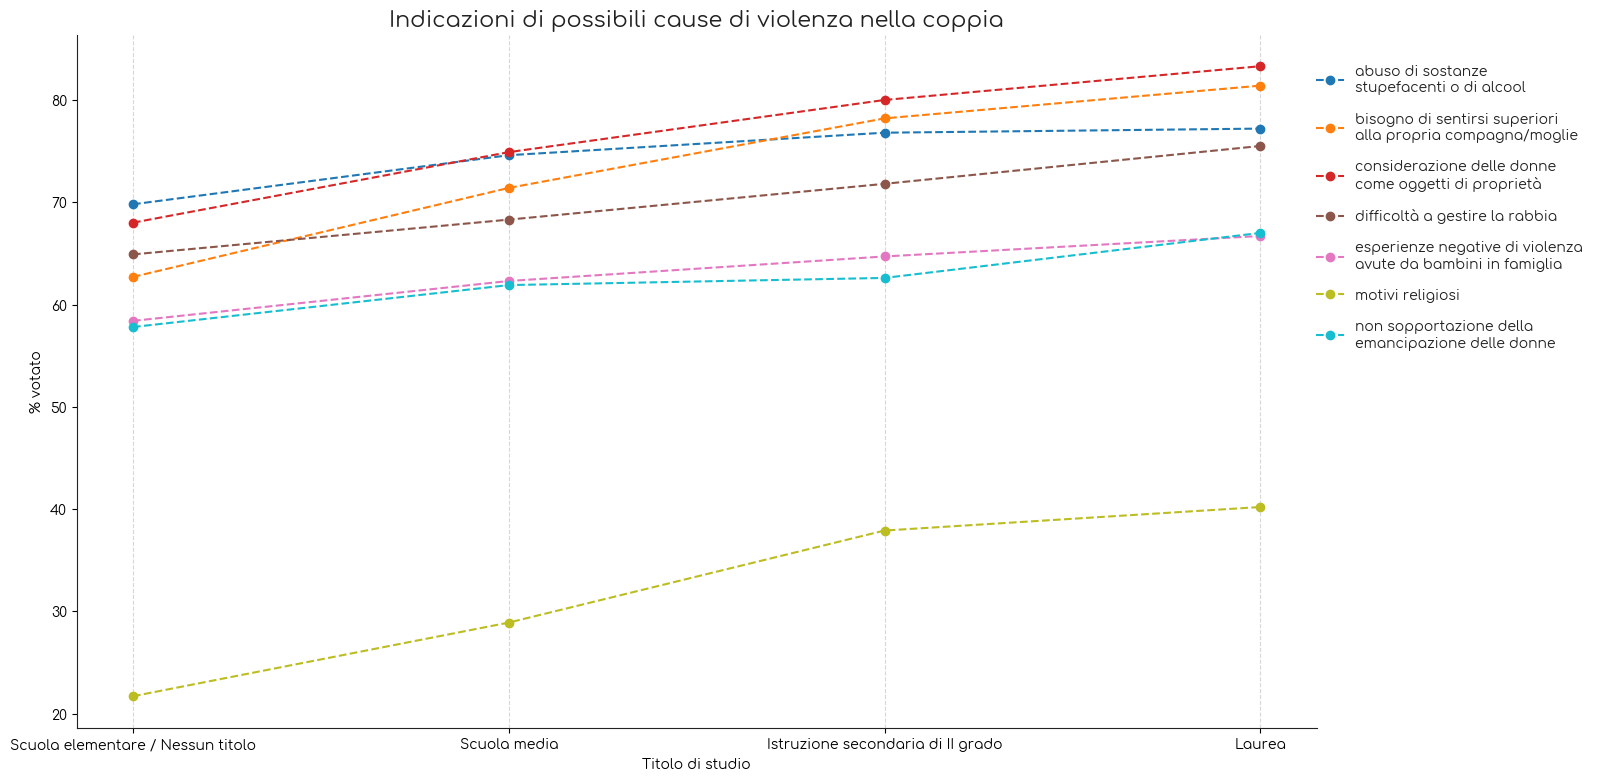

In [11]:
df_all_pivot.plot(figsize=(16,9), linestyle='--', marker='o', colormap='tab10')

plt.legend(loc='upper right',
           labels=['abuso di sostanze\nstupefacenti o di alcool',
                   'bisogno di sentirsi superiori\nalla propria compagna/moglie',
                   'considerazione delle donne\ncome oggetti di proprietà',
                   'difficoltà a gestire la rabbia',
                   'esperienze negative di violenza\navute da bambini in famiglia',
                   'motivi religiosi',
                   "non sopportazione della\nemancipazione delle donne",],
           bbox_to_anchor=(1.225, 0.975),
        #    title="Possibili cause",
        #    title_fontproperties={'weight':'bold', 'size':11},
           labelspacing=1.25,
           frameon=False,
           ncol=1
           )

plt.xticks(np.arange(4), labels=["Scuola elementare / Nessun titolo", "Scuola media", "Istruzione secondaria di II grado", "Laurea"])
plt.xlabel("Titolo di studio")
plt.ylabel("% votato")
plt.title("Indicazioni di possibili cause di violenza nella coppia")

plt.grid(axis='x')

plt.show()